In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
datacsv = pd.read_csv('29dataset_dropped_opt.csv', index_col=0, header=0)
df = pd.DataFrame(data = datacsv)
del df ['A_para']
del df ['B_para']
df

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDepolar-P,C2-H stretch\nFrequency,C2-H stretch\nDepolar-P,O NBO Charge,C2-O length,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)"
M1,-384.890280,2.976386,82.320667,0.138206,1792.56,67.2699,0.3176,2895.10,0.2969,-0.536,1.218,6.75,1.76,4.33,0.01238,-0.24837,0.000,0.000,0.00000
M2,-384.891819,3.393730,82.941333,0.137724,1799.19,82.1492,0.3278,2905.37,0.3060,-0.531,1.717,6.75,1.76,4.40,0.01381,-0.24819,0.000,0.000,0.00000
M3,-384.892348,3.780420,84.218000,0.137661,1797.59,103.3745,0.3431,2903.04,0.3077,-0.533,1.217,7.70,1.81,3.16,0.01495,-0.25054,0.000,0.000,0.00000
M4,-460.095229,4.813919,87.394333,0.143198,1782.58,82.3785,0.2987,2995.61,0.2999,-0.541,1.220,6.76,1.75,5.37,0.02047,-0.24760,0.000,0.000,0.00000
M5,-460.097202,2.178176,87.727333,0.143040,1796.18,87.0887,0.3267,2913.73,0.3037,-0.533,1.217,6.75,1.75,5.35,0.01238,-0.25296,0.000,0.000,0.00000
M6,-460.098685,4.988572,90.681000,0.143103,1792.93,139.4349,0.3464,2896.49,0.3137,-0.540,1.218,8.85,1.78,3.18,0.01690,-0.25130,0.000,0.000,0.00000
M7,-2916.675203,3.248754,88.329333,0.100233,1791.24,61.3724,0.2859,3000.48,0.2480,-0.525,1.217,6.78,1.78,4.86,-0.00043,-0.26416,0.000,0.000,0.00000
M8,-2916.676864,1.869718,89.644000,0.100118,1804.15,84.9797,0.3394,2918.78,0.3033,-0.521,1.215,6.86,1.77,4.83,-0.00168,-0.26249,0.000,0.000,0.00000
M9,-2916.677538,2.065982,91.846667,0.100110,1800.83,146.4000,0.3339,2913.59,0.2997,-0.525,1.216,8.51,1.95,3.16,-0.00253,-0.26684,0.000,0.000,0.00000
M10,-424.203430,2.994698,94.245667,0.166295,1778.72,64.2892,0.2735,2962.69,0.3055,-0.540,1.221,6.81,1.88,5.60,-0.06031,-0.24371,0.000,0.000,0.00000


In [14]:
#エルボー法でnの決定

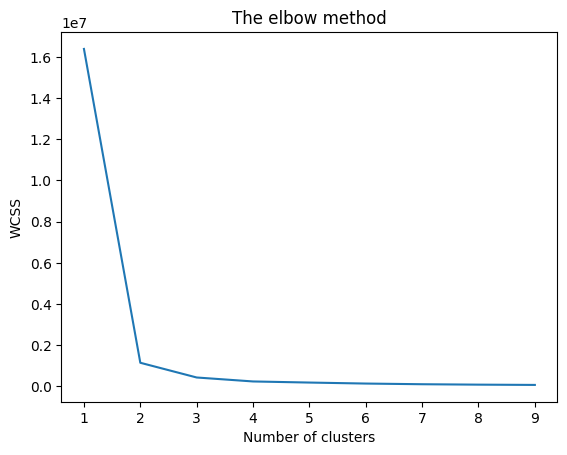

In [6]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [4]:
#以下 KMeansクラスタリング

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df)
print(model.labels_)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0]


In [7]:
df["class"]=model.fit_predict(df)
df

,E(RB3LYP),Dipole Moment,Polarizability (a),Zero-point Energy Correction,C=O stretch\nFrequency,C=O stretch\nRaman Activity,C=O stretch\nDipolar-P,C2-H stretch\nFrequency,C2-H stretch\nDipolar-P,O NBO Charge,C2-O length,L,B1,B5,LUMO(chk),HOMO(chk),X=O(ONBO),X=O(CNBO),"C Length(X=O,CHO)",class
M1,-384.890280,2.976386,82.320667,0.138206,1792.56,67.2699,0.3176,2895.10,0.2969,-0.536,1.218,6.75,1.76,4.33,0.01238,-0.24837,0.000,0.000,0.00000,0
M2,-384.891819,3.393730,82.941333,0.137724,1799.19,82.1492,0.3278,2905.37,0.3060,-0.531,1.717,6.75,1.76,4.40,0.01381,-0.24819,0.000,0.000,0.00000,0
M3,-384.892348,3.780420,84.218000,0.137661,1797.59,103.3745,0.3431,2903.04,0.3077,-0.533,1.217,7.70,1.81,3.16,0.01495,-0.25054,0.000,0.000,0.00000,0
M4,-460.095229,4.813919,87.394333,0.143198,1782.58,82.3785,0.2987,2995.61,0.2999,-0.541,1.220,6.76,1.75,5.37,0.02047,-0.24760,0.000,0.000,0.00000,0
M5,-460.097202,2.178176,87.727333,0.143040,1796.18,87.0887,0.3267,2913.73,0.3037,-0.533,1.217,6.75,1.75,5.35,0.01238,-0.25296,0.000,0.000,0.00000,0
M6,-460.098685,4.988572,90.681000,0.143103,1792.93,139.4349,0.3464,2896.49,0.3137,-0.540,1.218,8.85,1.78,3.18,0.01690,-0.25130,0.000,0.000,0.00000,0
M7,-2916.675203,3.248754,88.329333,0.100233,1791.24,61.3724,0.2859,3000.48,0.2480,-0.525,1.217,6.78,1.78,4.86,-0.00043,-0.26416,0.000,0.000,0.00000,1
M8,-2916.676864,1.869718,89.644000,0.100118,1804.15,84.9797,0.3394,2918.78,0.3033,-0.521,1.215,6.86,1.77,4.83,-0.00168,-0.26249,0.000,0.000,0.00000,1
M9,-2916.677538,2.065982,91.846667,0.100110,1800.83,146.4000,0.3339,2913.59,0.2997,-0.525,1.216,8.51,1.95,3.16,-0.00253,-0.26684,0.000,0.000,0.00000,1
M10,-574.610696,4.857468,105.108333,0.175809,1785.14,73.4493,0.2624,2986.57,0.3089,-0.528,1.219,6.77,1.89,5.36,0.02380,-0.23255,0.000,0.000,0.00000,0


In [11]:
#[[M7,M8,M9],[M18,M26],[rest]]でクラスター